In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

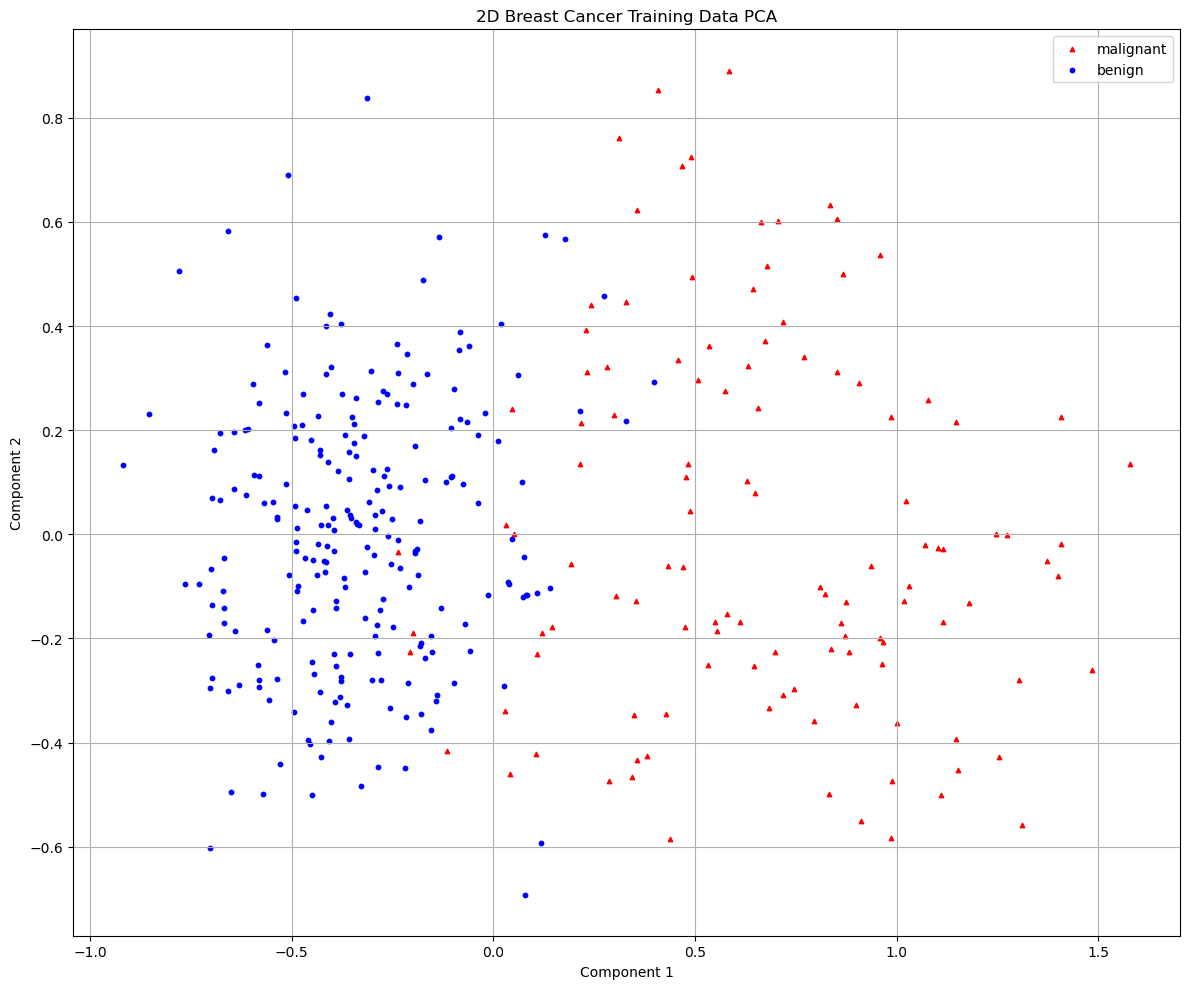

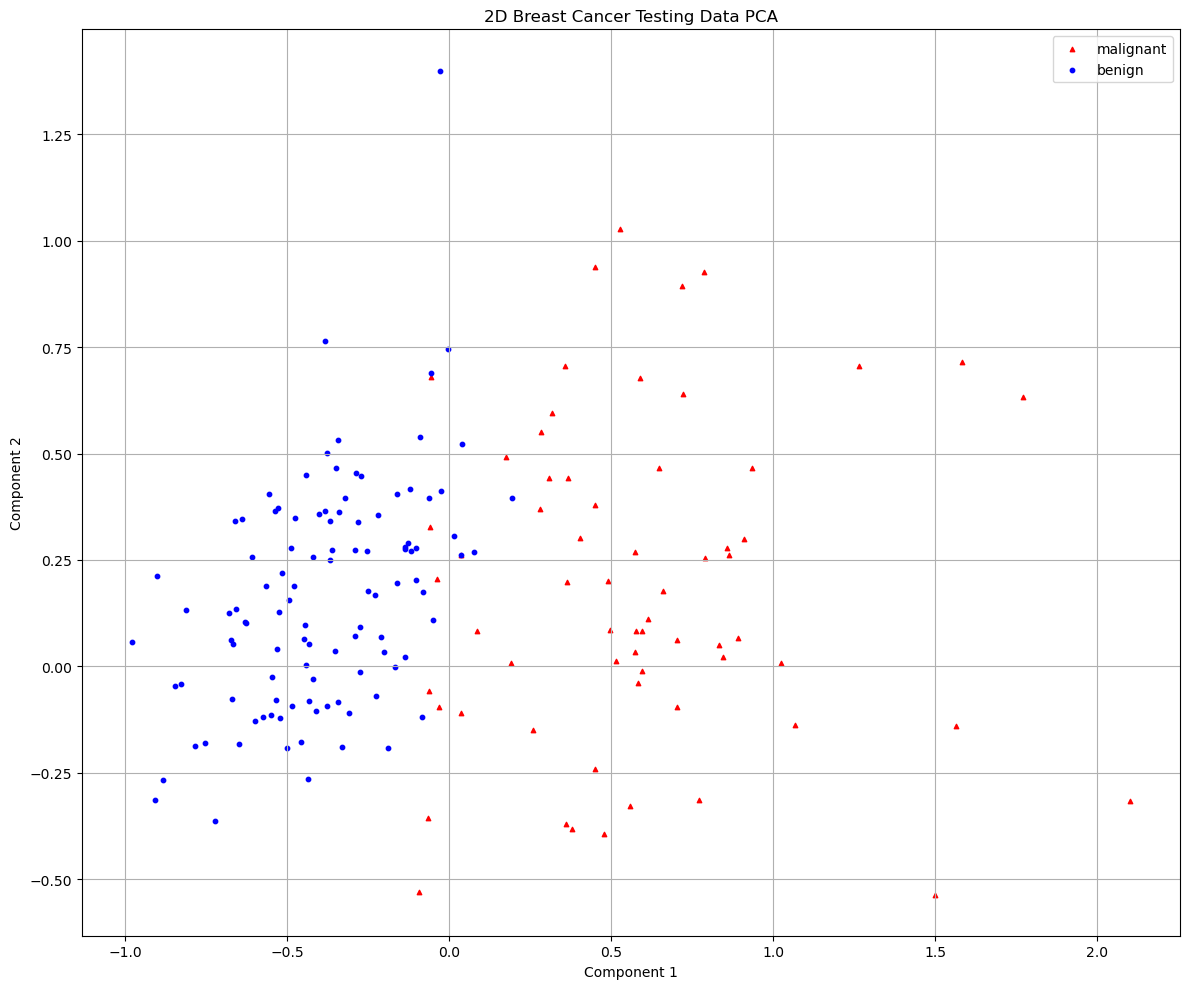

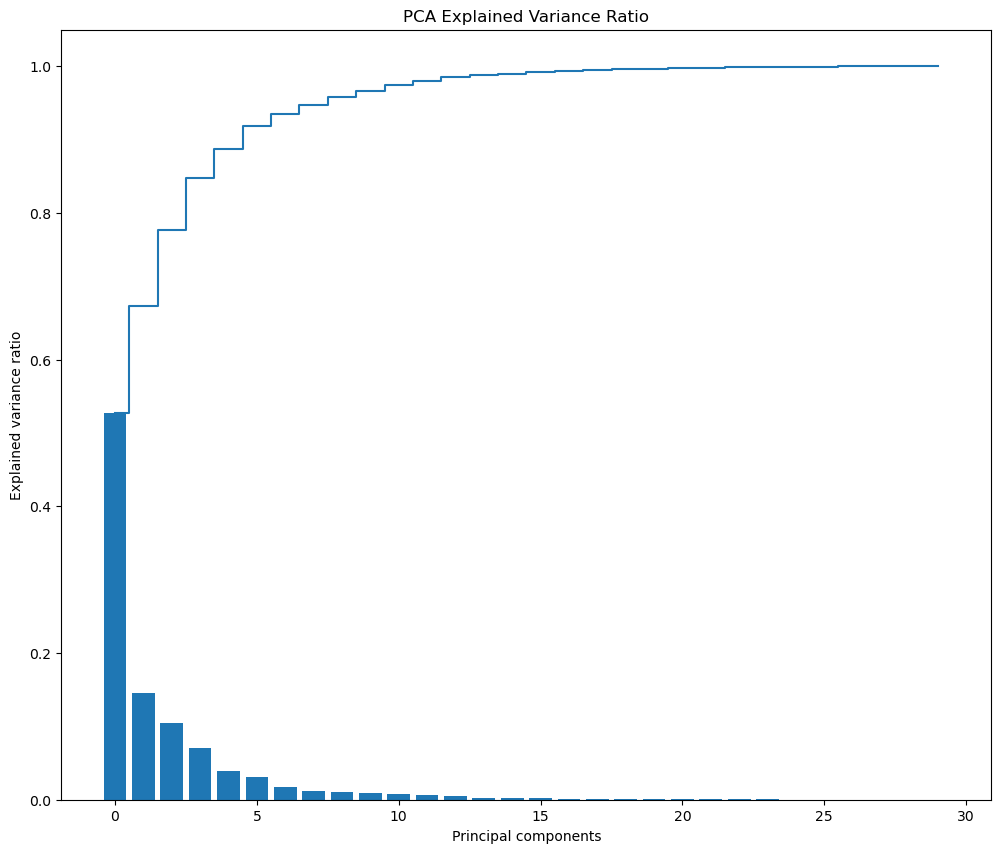

In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

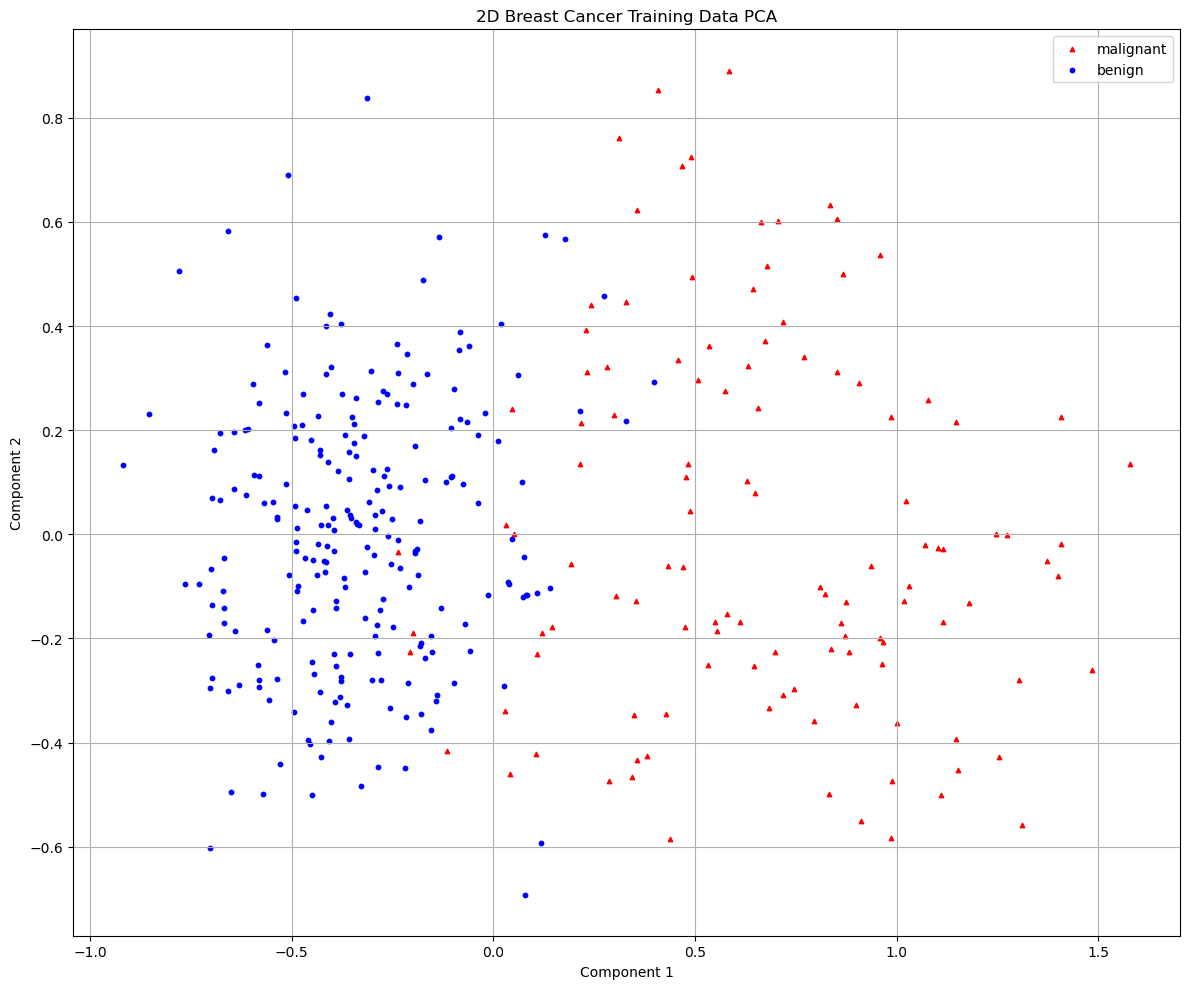

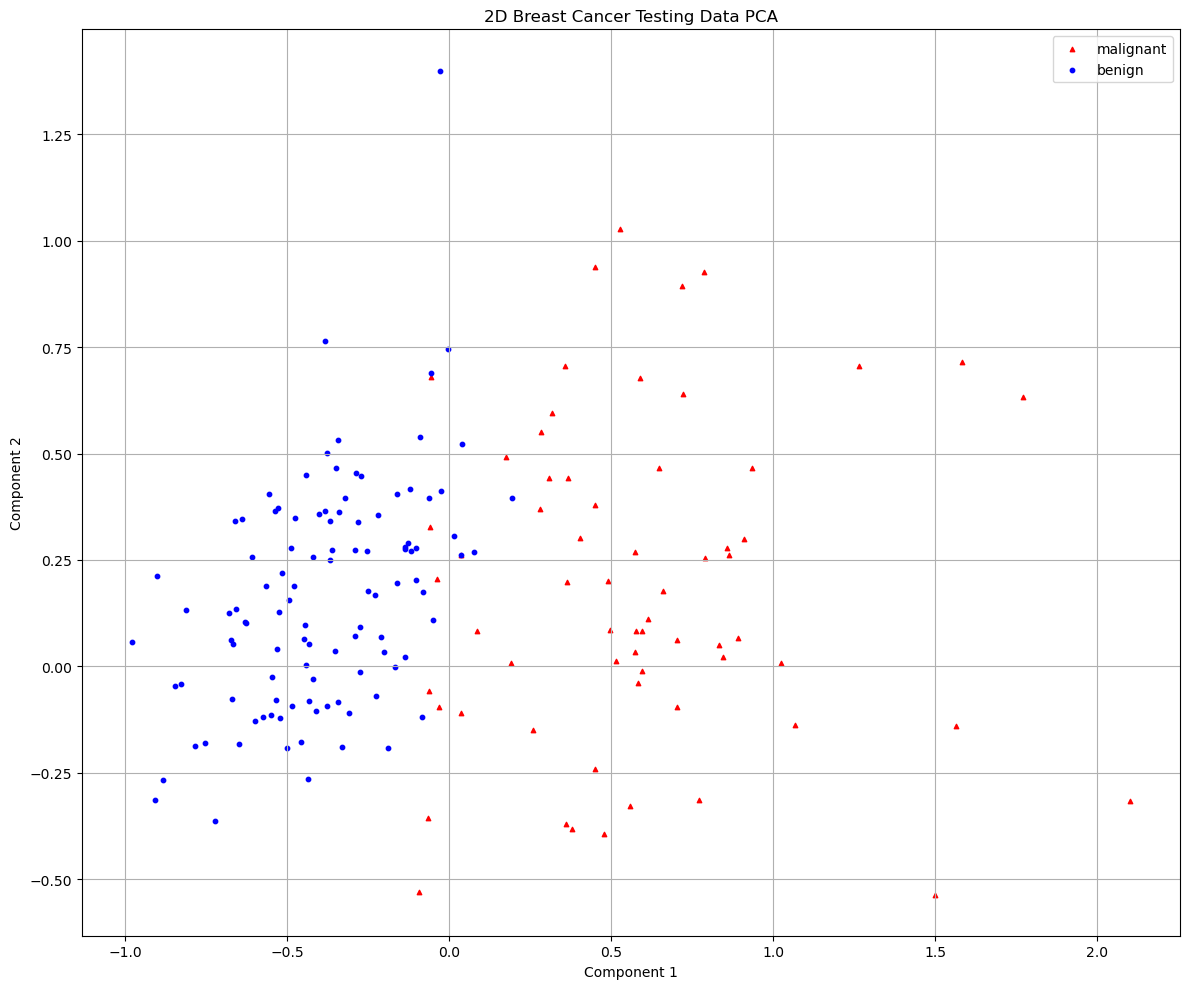

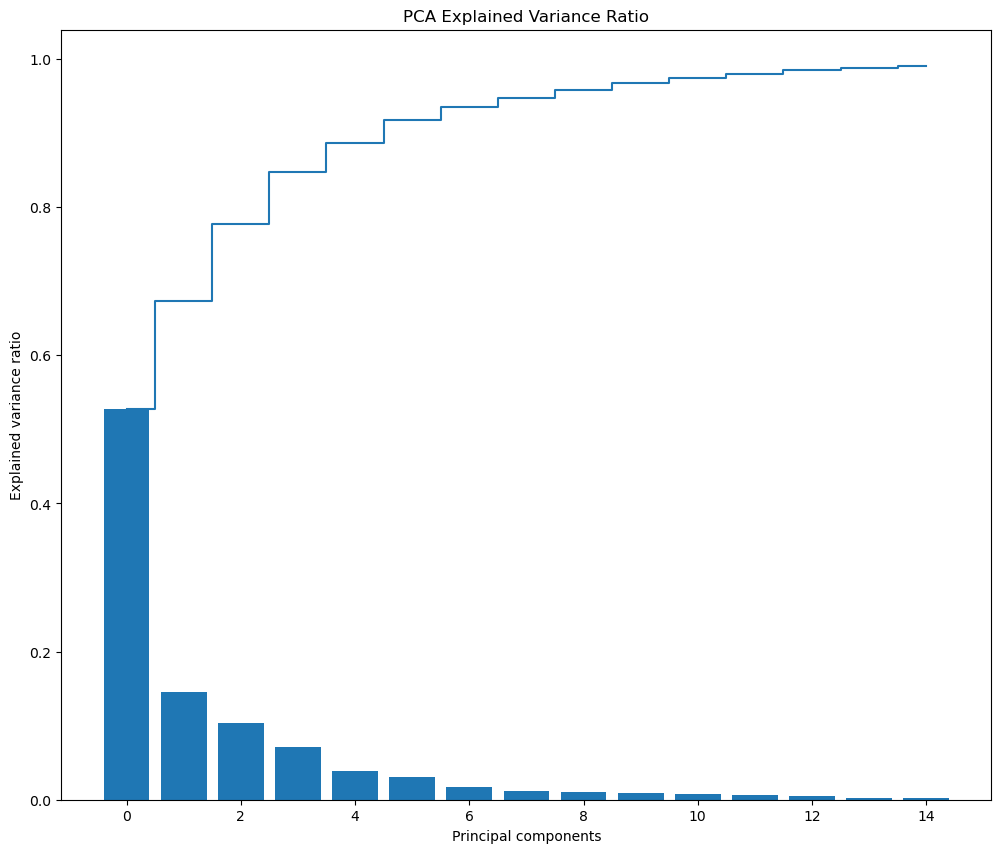

[I 2025-04-27 03:49:35,514] A new study created in memory with name: no-name-7d5a6e28-3c92-4eee-92c6-fc202aa7550a
[I 2025-04-27 03:49:37,565] Trial 0 finished with value: 0.9518712273641852 and parameters: {'n_estimators': 1490, 'learning_rate': 0.015697827592548133, 'num_leaves': 39, 'max_depth': 9, 'min_child_samples': 65, 'subsample': 0.8779665194790908, 'colsample_bytree': 0.5843085905096014, 'reg_alpha': 0.0007945769862033262, 'reg_lambda': 5.27196031620603e-07}. Best is trial 0 with value: 0.9518712273641852.
[I 2025-04-27 03:49:48,400] Trial 1 finished with value: 0.9519517102615694 and parameters: {'n_estimators': 6768, 'learning_rate': 0.18874494573190992, 'num_leaves': 98, 'max_depth': 7, 'min_child_samples': 44, 'subsample': 0.5532793032791209, 'colsample_bytree': 0.7911988695974601, 'reg_alpha': 4.8438384876508965e-05, 'reg_lambda': 0.10106153997414653}. Best is trial 1 with value: 0.9519517102615694.
[I 2025-04-27 03:49:57,384] Trial 2 finished with value: 0.94885311871227

Best trial:
Accuracy: 0.9659557344064387
Best hyperparameters:  {'n_estimators': 6420, 'learning_rate': 0.08500750759610211, 'num_leaves': 72, 'max_depth': 9, 'min_child_samples': 24, 'subsample': 0.4923505604606202, 'colsample_bytree': 0.7771618946933733, 'reg_alpha': 4.5984754790856515e-07, 'reg_lambda': 1.0970540043105236e-06}


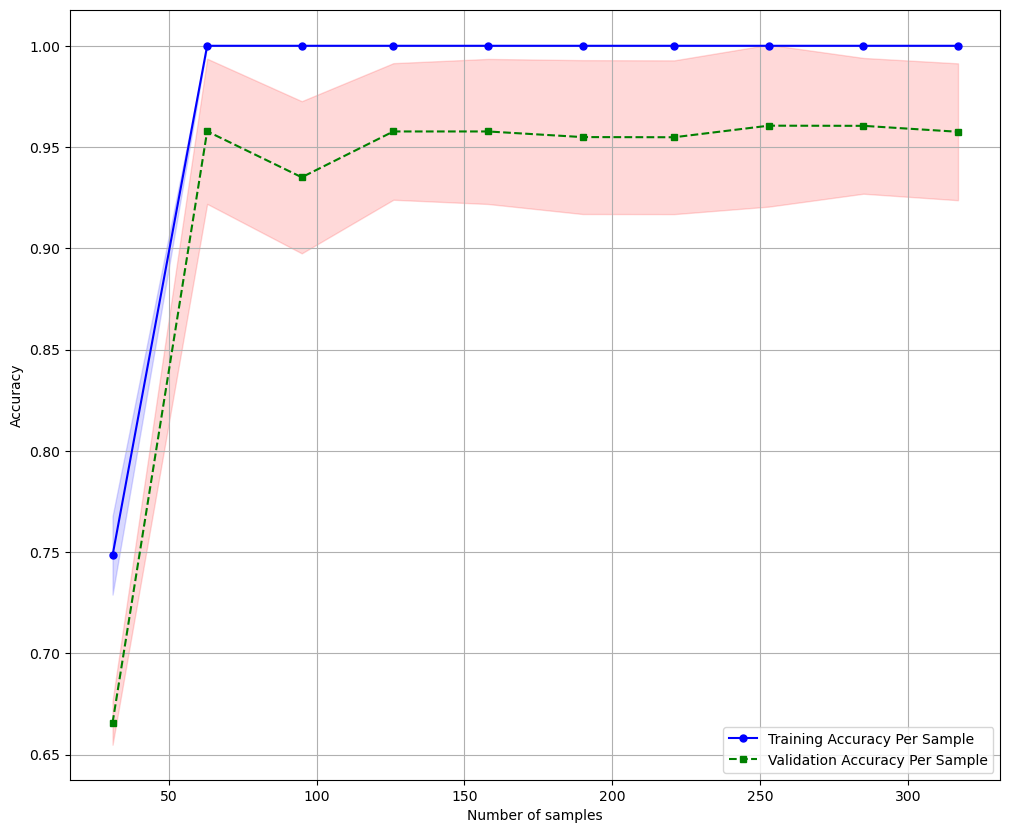

Confusion Matrix
[[ 55   9]
 [  0 107]]
Accuracy: 0.9474, Precision: 0.9224, Recall: 1.0000, F1: 0.9596, AUC:0.9822


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)